In [7]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [10]:
# Define the function to fit
def func(e, a, b, c):
    return a * e**2 + b * e + c

def func_exp(e, a, b, c):
    return a * np.exp(b * e) + c

# Given data
m = np.array([0.0164508 , 0.04556577, 0.07736161, 0.11774289, 0.17046954,
              0.22620313, 0.25343155, 0.32290698, 0.35922376, 0.3953197 ,
              0.65995343, 0.89270318, 1.1128295 , 1.32946136, 1.4646585 ,
              1.4155726 , 1.58264148, 1.83993827, 1.84137778, 1.84044455,
              1.83633519, 1.97000045, 2.02295147, 2.10364923, 2.11880471,
              1.98213345, 2.12864174, 1.98376487, 2.19035943, 2.09164309])
e = np.array([0.7273485 , 0.7397721 , 0.72272086, 0.7214041 , 0.703575  ,
              0.6877838 , 0.67292   , 0.65484965, 0.6390722 , 0.6262244 ,
              0.5433579 , 0.46257067, 0.39424786, 0.33729392, 0.29061925,
              0.25288275, 0.22260305, 0.19788788, 0.17995273, 0.17233008,
              0.16295493, 0.15594569, 0.15221928, 0.15059383, 0.14819326,
              0.14446019, 0.14305483, 0.14218482, 0.14157413, 0.14123192])

# Fit polynomial
c_poly, _ = curve_fit(func, e, m)

# Print the coefficients
print("poly coefficients (a, b, c):", c_poly)

# Fit exponential
c_exp, _ = curve_fit(func_exp, e, m)

# Print the coefficients
print("expo coefficients (a, b, c):", c_exp)

poly coefficients (a, b, c): [ 1.40255528 -4.53645698  2.65810029]
expo coefficients (a, b, c): [ 5.33642524 -0.91546108 -2.63974019]


In [12]:
from gplearn.genetic import SymbolicRegressor

In [14]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(e.reshape(-1,1), m)

/eos/home-k/kiwoznia/software/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.81           1181.5       15         0.125573         0.197527      2.24m
   1    13.61          2.47496       25        0.0607839        0.0954509      1.31m
   2    12.66          2.04099       25        0.0604771        0.0982123      1.25m
   3     9.57          1.80191       25        0.0545791         0.151294      1.14m
   4     5.56          1.25922       19        0.0651629        0.0547894      1.04m
   5     3.72          1.15343        7        0.0841653         0.215179     51.29s
   6     4.53         0.998236        7        0.0822934         0.232027     48.12s
   7     6.75          1.36537        7        0.0843195         0.213791     53.04s
   8     7.21         0.953593        7        0.0822934         0.232027  

SymbolicRegressor(max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

In [18]:
# MI = (0.941-E)/(0.231+E)
func_gen = lambda e: (-e+0.941)/(e+0.231)

Text(0, 0.5, 'MI')

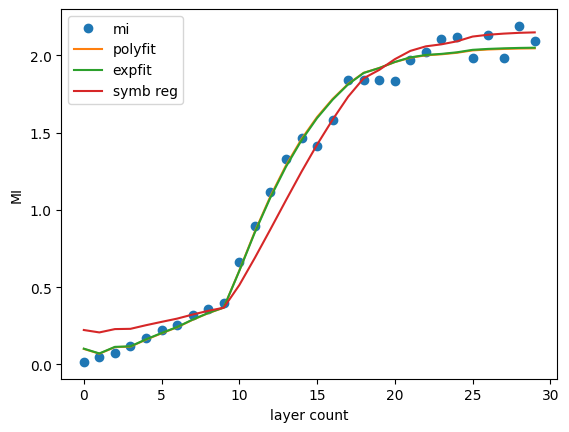

In [21]:
plt.plot(m,'o',label='mi')
plt.plot(func(e,*c_poly),label='polyfit')
plt.plot(func_exp(e,*c_exp),label='expfit')
plt.plot(func_gen(e),label='symb reg')
plt.legend()
plt.xlabel('layer count')
plt.ylabel('MI')